In [1]:
#importing the required libraries.
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
sn.set_style("whitegrid")
from wordcloud import WordCloud, STOPWORDS

## DATA READING AND CLEANING

In [2]:
#reading the data
data = pd.read_csv(r"C:\Users\Sarah\Documents\EXTRA CURRICULAR\SHE CODE AFRICA\archive-3\netflix_titles.csv", index_col="show_id")
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#checking for null values.
data.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### Three columns have large numbers of missing values (director, cast and country). Date_added, rating and duration columns have small numbers of missing values.

In [4]:
#filling the missing values in the director, cast and country columns with a default string.
data["director"].fillna("Unknown", inplace=True)
data["cast"].fillna("Unknown", inplace=True)
data["country"].fillna("Unknown", inplace=True)

In [5]:
data[data["date_added"].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [6]:
#filling the missing values in the date_added column with the correct values
data.at['s6067','date_added'] = 'September 15, 2014'
data.at['s6175','date_added'] = 'September 15, 2014'
data.at['s6796','date_added'] = 'April 6, 2016'
data.at['s6807','date_added'] = 'January 1, 2015'
data.at['s6902','date_added'] = 'January 4, 2016'
data.at['s7197','date_added'] = 'July 6, 2017'
data.at['s7255','date_added'] = 'June 1, 2015'
data.at['s7407','date_added'] = 'January 13, 2017'
data.at['s7848','date_added'] = 'September 15, 2014'
data.at['s8183','date_added'] = 'September 15, 2014'

In [7]:
data[data["rating"].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [8]:
#filling the missing values in the ratings column with the correct values
data.at['s5990','rating'] = 'TV-PG'
data.at['s6828','rating'] = 'TV-PG'
data.at['s7313','rating'] = 'TV-PG'
data.at['s7538','rating'] = 'TV-MA'

In [9]:
data[data["duration"].isnull()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### The three missing values in the duration column are wrongly placed in the rating column.

In [10]:
#filling the missing values in the duration column with the correct values
data.at['s5542','duration'] = '74 min'
data.at['s5795','duration'] = '84 min'
data.at['s5814','duration'] = '66 min'

In [11]:
#replacing the wrong values in the rating column with the right values
data.at['s5814','rating'] = 'TV-MA'
data.at['s5795','rating'] = 'TV-MA'
data.at['s5542','rating'] = 'TV-MA'

In [12]:
#checking the unique values in the rating column
data["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

#### All values look correct.

In [13]:
#checking the unique values in the duration column
data["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

#### All values look correct.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


#### The date_added and duration columns' data types are inappropriate

In [15]:
#converting the data type of the date_added column to datetime.
data["date_added"] = pd.to_datetime(data["date_added"])

In [16]:
data["date_added"]

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8807, dtype: datetime64[ns]

In [17]:
#converting the data type of the duration column to integer.
lis_f = [] #an empty list
for val in data["duration"]:
    lis = val.split() #a list of strings
    lis.remove(lis[1]) #removing the second string in the list which is the suffix- min/season(s)
    lis = ''.join(lis) #converting the list to a string
    lis_f.append(lis) #appending the string to a final list
data["duration"] = lis_f #replacing the values in the duration column with this new list of edited strings having no suffix
data["duration"] = pd.to_numeric(data["duration"]) #converting the duration column to integers

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8807 non-null   object        
 1   title         8807 non-null   object        
 2   director      8807 non-null   object        
 3   cast          8807 non-null   object        
 4   country       8807 non-null   object        
 5   date_added    8807 non-null   datetime64[ns]
 6   release_year  8807 non-null   int64         
 7   rating        8807 non-null   object        
 8   duration      8807 non-null   int64         
 9   listed_in     8807 non-null   object        
 10  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 1.1+ MB


In [19]:
#removing excess whitespace in string columns.
obj = ["type","title","director","cast","country","rating","listed_in","description"] #string columns
for col in obj: #iterating through the list of string columns
    for entry in data[col]: #iterating through the values of each string column
        entry = entry.strip() #stripping the values of excess whitespace

In [20]:
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### No null value

## DATA EXPLORATION

In [21]:
data.corr()

,release_year,duration
release_year,1.000000,-0.249188
duration,-0.249188,1.000000


#### No significant correlation between the only two integer columns- duration and release_year.

In [22]:
data.describe()

,release_year,duration
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


#### The oldest release year is 1925 while the earliest is 2021. 
#### The shortest duration is 1 (most likely signifying 1 season) while the longest duration is 312 (most likely in minutes). 

In [23]:
sorted(data[data["type"] == 'Movie']["duration"])

[3,
 5,
 8,
 9,
 10,
 11,
 11,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 16,
 17,
 17,
 17,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 43,
 44,
 44,
 44,
 44,
 44,

#### The shortest movie duration is 3 minutes.

In [24]:
data.describe(include=object).T

,count,unique,top,freq
type,8807,2,Movie,6131
title,8807,8807,Judy Moody and the Not Bummer Summer,1
director,8807,4529,Unknown,2634
cast,8807,7693,Unknown,825
country,8807,749,United States,2818
rating,8807,14,TV-MA,3211
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


#### There are 2 types of Netflix contents. Movies are more than TV shows. 
#### No content title was repeated.
#### Duplicates exist in the director, cast and country columns.
#### There are 14 unique ratings and 514 unique categories. TV-MA is the most frequent rating while Dramas, International Movies is the most frequent category.

In [25]:
#checking the values in the country column.
data["country"].unique()

array(['United States', 'South Africa', 'Unknown', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, Unit

#### Some entries in the country column hold more than one country in a single string, meaning some movies/TV shows have multiple countries of production.

In [26]:
#checking the unique values in the listed_in column
data["listed_in"].unique()

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

#### The listed_in column also has multiple categories in a single string, signifying the different categories a single movie/TV show belongs to.

In [27]:
#checking the values in the director column
list(data["director"].unique())

['Kirsten Johnson',
 'Unknown',
 'Julien Leclercq',
 'Mike Flanagan',
 'Robert Cullen, José Luis Ucha',
 'Haile Gerima',
 'Andy Devonshire',
 'Theodore Melfi',
 'Kongkiat Komesiri',
 'Christian Schwochow',
 'Bruno Garotti',
 'Pedro de Echave García, Pablo Azorín Williams',
 'Adam Salky',
 'Olivier Megaton',
 'K.S. Ravikumar',
 'Alex Woo, Stanley Moore',
 'S. Shankar',
 'Rajiv Menon',
 'Dennis Dugan',
 'Scott Stewart',
 'Robert Luketic',
 'Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket Chaudhary',
 'Daniel Sandu',
 'Cédric Jimenez',
 'George Nolfi',
 'Steven Spielberg',
 'Jeannot Szwarc',
 'Joe Alves',
 'Joseph Sargent',
 'Tyler Greco',
 'Daniel Espinosa',
 'Bunmi Ajakaiye',
 'Antoine Fuqua',
 'Toshiya Shinohara',
 'Masahiko Murata',
 'Hajime Kamegaki',
 'Hirotsugu Kawasaki',
 'Toshiyuki Tsuru',
 'Tensai Okamura',
 'David Yarovesky',
 'Hanns-Bruno Kammertöns, Vanessa Nöcker, Michael Wech',
 'David A. Vargas',
 'Kemi Adetiba',
 'Ben Simms',
 'Prakash Satam',
 'Delhiprasad Deenadayalan',
 '

#### Some entries in the director column have more than one directors in a single string. This represents cases where more than one director worked on a movie/TV show.

In [28]:
#splitting the cleaned data into two (movies and tv shows) for easy visualization.
movies = data[data["type"] == 'Movie']
tvshow = data[data["type"] == 'TV Show']

# DATA VISUALIZATION.

### HOW MANY MOVIES AND TV SHOWS ARE THERE?

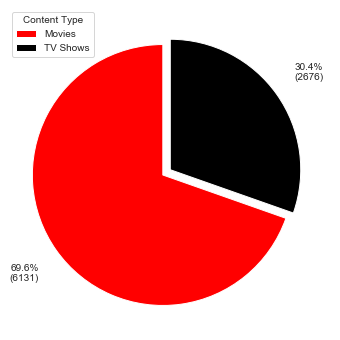

In [29]:
plt.figure(figsize=(14,6))
p = data.groupby("type")["type"].count().values
plt.pie(p,labels=["Movies","TV Shows"],labeldistance=None, startangle=90,explode=[0.07,0],colors=["red","black"],autopct=lambda q: '{:.1f}%\n({:.0f})'.format(q,(q/100)*p.sum()),pctdistance=1.3)
plt.legend(title="Content Type")
plt.show()

#### There are 6131 movies and 2676 TV shows on Netflix. About 70% of Netflix content (up to year 2021) are movies while a mere 30% are TV shows.

### WHAT IS THE TREND OF MOVIE ADDITION IN NETFLIX OVER THE YEARS?
### DID THEY ADD SHORTER MOVIES OR LONGER MOVIES?

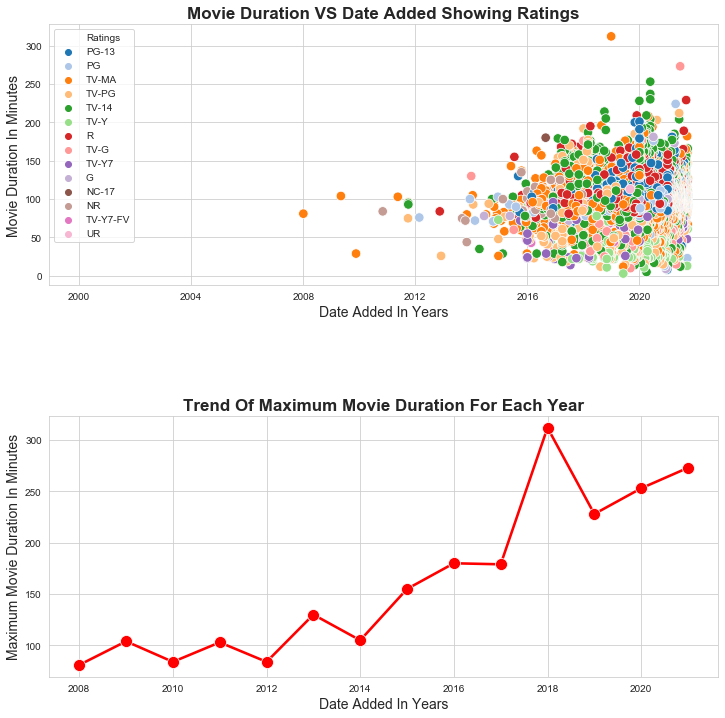

In [30]:
fig = plt.figure(figsize=(12,12))
x = movies["date_added"]
y = movies['duration']
z = movies["rating"]
years = movies["date_added"].dt.year
#first plot
ax = fig.add_subplot(211)
sn.scatterplot(x, y, hue=z,s=90,palette='tab20')
plt.xlabel("Date Added In Years", fontsize=14)
plt.ylabel("Movie Duration In Minutes", fontsize= 14)
plt.title("Movie Duration VS Date Added Showing Ratings", fontsize= 17, fontweight='bold')
legend= plt.legend()
legend.texts[0].set_text("Ratings")
#second plot
ax2 = fig.add_subplot(212)
max_duration_year = movies.groupby(years)["duration"].max()
sn.lineplot(max_duration_year.index, max_duration_year.values,color='red',marker='o',markersize=12,linewidth=2.6)
plt.xlabel("Date Added In Years", fontsize=14)
plt.ylabel("Maximum Movie Duration In Minutes", fontsize= 14)
plt.title("Trend Of Maximum Movie Duration For Each Year", fontsize= 17, fontweight='bold')
plt.subplots_adjust(hspace=0.5)
plt.show()

#### Asides the fact that Netflix added fewer movies in older years (most of the movies were added in more recent years; from 2016-2021), they also added lengthier movies over the years. In 2008, the longest movie ran for less than 100 minutes. The maximum movie duration steadily increased over the years and peaked in 2018 with the longest movie duration ever (> 300 minutes i.e. > 5 hours). 
#### In 2021, the maximum movie duration is between 250-300 minutes(4 hours 10 minutes- 5 hours).
#### Most movies added in older years (2008-2015) are rated TV-MA (for Mature Adult), but in recent years, we have a lot of TV-14-rated movies (i.e. for 14 years and above). The longest movie is rated TV-MA, second longest is rated TV-G (General Audience).

### HOW IS MOVIE DURATION DISTRIBUTED?

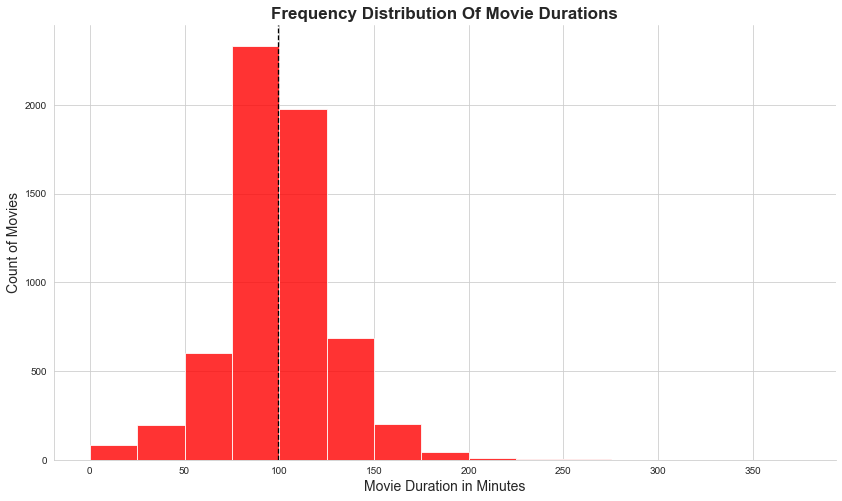

In [31]:
plt.figure(figsize=(14,8))
d = movies["duration"]
dis = sn.distplot(d, bins=np.arange(min(d)-3,max(d)+88,25),kde=False,hist_kws={"color": "r","alpha":0.8})
plt.xlabel("Movie Duration in Minutes", Fontsize=14)
plt.ylabel("Count of Movies", Fontsize=14)
plt.title("Frequency Distribution Of Movie Durations", Fontsize=17, fontweight='bold')
plt.axvline(d.mean(), ls='--', color='black', lw=1.3)
dis.spines["right"].set_visible(False)
dis.spines["top"].set_visible(False)
plt.show()

#### Movie duration is normally distributed with the average movie duration being 100 minutes (1 hour 40 minutes). 
#### There are movies that run for less than an hour (60 minutes), and few movies run for more than 2 and a half hours (150 minutes). Most movies (>2000 movies) run for 75-100 minutes (1 hour 15 minutes- 1 hour 40 minutes).

### WHAT IS THE MOST COMMON RATING FOR RENEWED TV SHOWS? R?
### WHAT IS THE TREND FOR TV SHOW ADDITION IN NETFLIX?

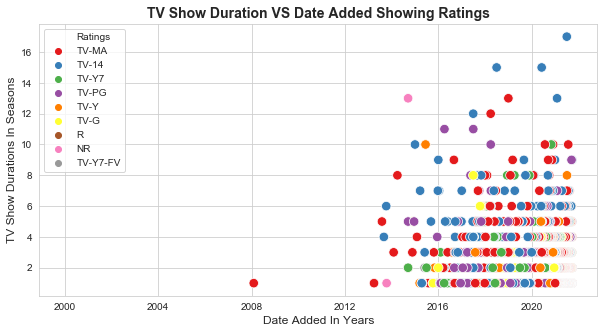

In [32]:
x =  tvshow["date_added"]
y = tvshow["duration"]
z = tvshow["rating"]
fig = plt.figure(figsize=(10,5))
scat = sn.scatterplot(x,y,hue=z,palette='Set1',s=90)
legend= plt.legend()
legend.texts[0].set_text("Ratings")
plt.title("TV Show Duration VS Date Added Showing Ratings", fontsize=14,fontweight='bold')
plt.xlabel("Date Added In Years",fontsize=12)
plt.ylabel("TV Show Durations In Seasons",fontsize=12)
plt.show()

#### The question I asked myself before plotting this graph was whether the TV shows that got renewed for another season are mostly R rated shows. One of the factors that influence TV show renewal is popularity among viewers. Thus, the answer to this question shows where people's interest lie.
#### Most TV shows with a high number of seasons (above 10 seasons) are rated TV-14 (14 years and above). Two are rated TV-MA (mature adult). Three are rated TV-PG. One is Not rated (NR). NR is used if a film has not been submitted for a rating or is an uncut version of a film that was submitted.
#### Another insight from this visual is that most (about 99.9%) of the TV Shows on Netflix were added between 2013 and 2021. Only one show was added in 2008.

### HOW IS TV SHOW DURATION DISTRIBUTED?

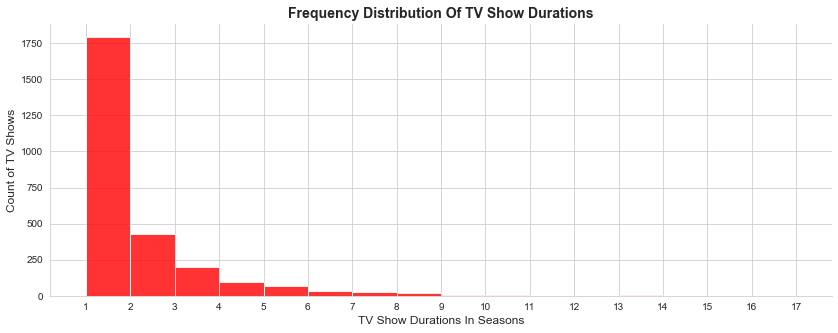

In [33]:
plt.figure(figsize=(14,5))
dis = sn.distplot(y,bins=np.arange(min(y),max(y)+1,1),hist_kws={'color':'r','alpha':0.8}, kde=False)
plt.xticks(np.arange(min(y), max(y)+1,1))
plt.title("Frequency Distribution Of TV Show Durations", fontsize=14,fontweight='bold')
plt.xlabel("TV Show Durations In Seasons", fontsize=12)
plt.ylabel("Count of TV Shows",fontsize=12)
dis.spines["top"].set_visible(False)
dis.spines["right"].set_visible(False)
plt.show()

#### The distribution is rightly skewed, with most TV shows (>1750 TV shows) having just 1 season.

In [34]:
tvshow["duration"].sort_values(ascending=False)

show_id
s549     17
s2424    15
s4799    15
s7848    13
s4221    13
         ..
s3506     1
s3507     1
s3511     1
s3516     1
s3696     1
Name: duration, Length: 2676, dtype: int64

#### The highest number of seasons is 17. A TV show had 17 seasons.

### WHICH COUNTRY HAD THE HIGHEST MOVIES AND TV SHOWS PRODUCTION IN IT?

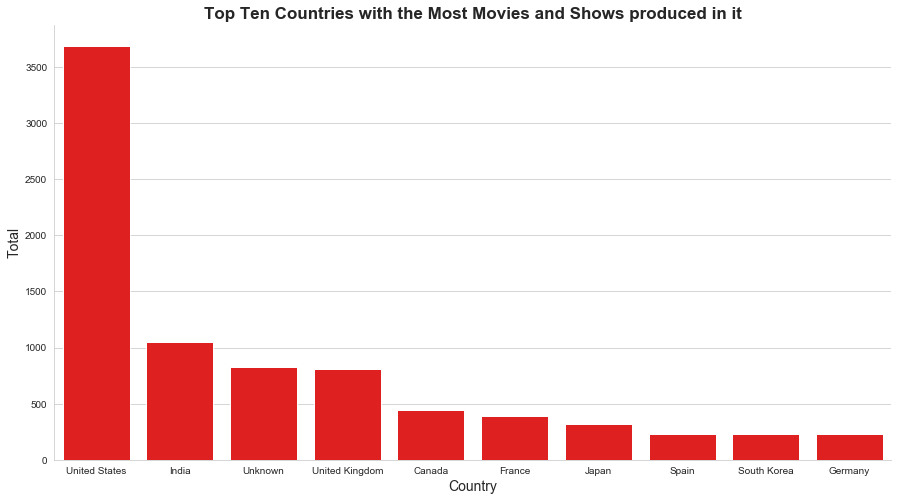

In [35]:
#creating a function that separates the values in a column like country (that has multiple values per entry) and counts each unique value.
def separate_values(column):
    diction = {} #creating an empty dictionary.
    for entry in column: #iterating through the column
        if ',' in entry:
            for sub_value in entry.split(','): #splitting each iteration if there is a comma present in it.
                sub_value = sub_value.strip() #trimming each split value in the formed list. split() returns a list.
                if sub_value in diction: #checking if the trimmed value is in the dictionary outside the loop. If it's there, the value is increased by one.
                    diction[sub_value] += 1
                else: #adding it to the dictionary with a starting value of one if it is not in the dictionary.
                    diction[sub_value] = 1
        else: #if no comma in the entry.
            if entry in diction:
                diction[entry] += 1
            else:
                diction[entry] = 1
    return diction
#Editting the country column to plot the values.
dic = separate_values(data['country'])
del dic[''] 
'''for some reason, this empty string is counted as a key when the loop runs. 
I am tired of thinking of why it pops up so I just deleted it instead.'''
#sorting the resultant dictionary in descending order and slicing the first ten elements in the sorted list.
keys = sorted(dic, key=dic.get, reverse=True)[:10] 
val = [dic[i] for i in keys] #retrieving the values for each element in the sliced list.
#plotting keys and val in a bar graph.
plt.figure(figsize=(15,8))
bar = sn.barplot(keys, val, color='red')
plt.title("Top Ten Countries with the Most Movies and Shows produced in it", fontsize=17, fontweight='bold')
plt.xlabel("Country", fontsize=14)
plt.ylabel("Total", fontsize=14)
bar.spines["right"].set_visible(False)
bar.spines["top"].set_visible(False)
plt.show()

#### The country with the highest content production is, unsurprisingly, the United States. However, India is the second highest, which is a little shocking. A country like the United Kingdom would have been expected to be the second most producing country (given its advancement in the film industry), but India- a third world country- has produced more movies and TV shows than the UK.
#### The category 'Unknown' should not be forgotten. It represents the previously null values and might be the reason for this shocking phenonmenon.


### WHAT PERIOD OF THE YEAR DID NETFLIX MOSTLY ADD MOVIES AND TV SHOWS?
#### SPRING, SUMMER, AUTUMN OR WINTER?

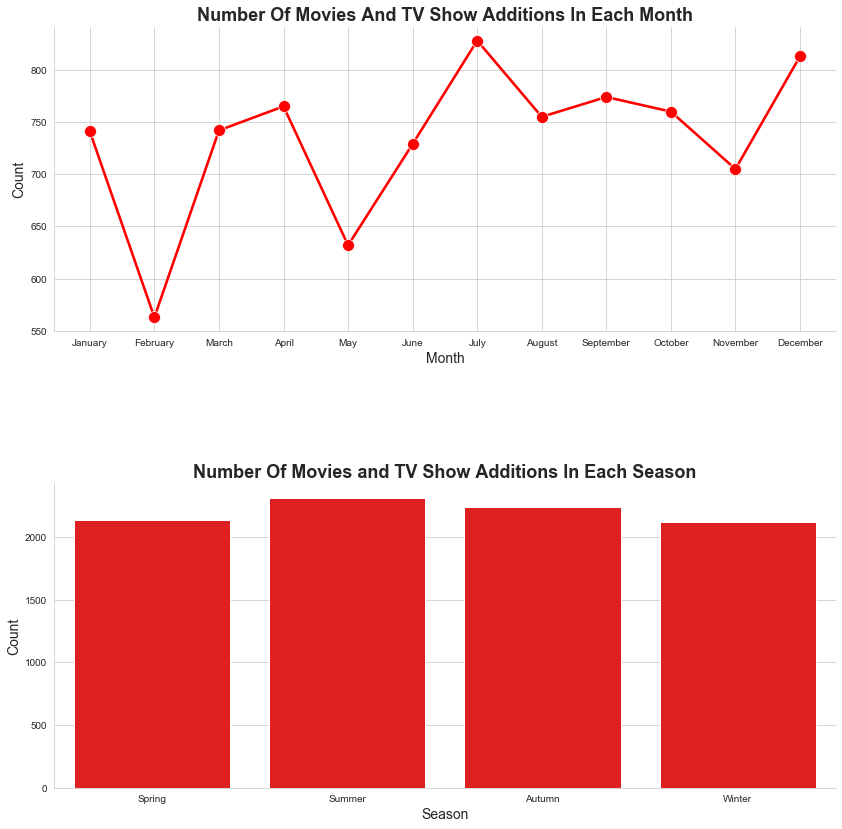

In [36]:
#plotting the number of movies added per month.
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(2,1,1)
#grouped by month then counted the values for each month
to_plot = data.groupby(data["date_added"].dt.strftime('%B'))["title"].count() 
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dic2 = {} #an empty dictionary
for month in months:
    dic2[month] = to_plot.loc[month] #placing the count for each month in a dictionary
x = list(dic2.keys()) #a list of the dictionary keys
y = list(dic2.values()) #a list of the dictionary values
#the first plot
line = sn.lineplot(x,y, sort=False,linewidth=2.6,color='r', marker='o', markersize=12) 
plt.title("Number Of Movies And TV Show Additions In Each Month", fontsize=18,fontweight='bold')
plt.xlabel("Month",fontsize=14)
plt.ylabel("Count",fontsize=14)
line.spines["top"].set_visible(False)
line.spines["right"].set_visible(False)
#the second plot
ax2 = fig.add_subplot(2,1,2)
spring = dic2["March"] + dic2["April"] + dic2["May"]
summer = dic2["June"] + dic2["July"] + dic2["August"]
autumn = dic2["September"] + dic2["October"] + dic2["November"]
winter = dic2["December"] + dic2["January"] + dic2["February"]
values = [spring,summer,autumn,winter]
period = pd.Series(index=["Spring","Summer","Autumn","Winter"], data=values)
bar = sn.barplot(x = period.index, y= period.values, color='red')
plt.title("Number Of Movies and TV Show Additions In Each Season", fontsize=18,fontweight='bold')
plt.xlabel("Season",fontsize=14)
plt.ylabel("Count",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.subplots_adjust(hspace=0.5)
plt.show()


#### July and December have the highest and second-highest count of Netflix content addition. This insight helps the Netflix user know when Netflix is most likely to add new content. The count is least in the month of February.
#### Spring season lasts from March-May. Summer lasts from June-August. Autumn lasts from September-November. Winter lasts from December-February.
#### Summer, as expected, has the highest count of Netflix additions. Most Netflix content were added in summer times.

### WHICH YEAR HAD THE HIGHEST NUMBER OF MOVIES/TV SHOW RELEASE?

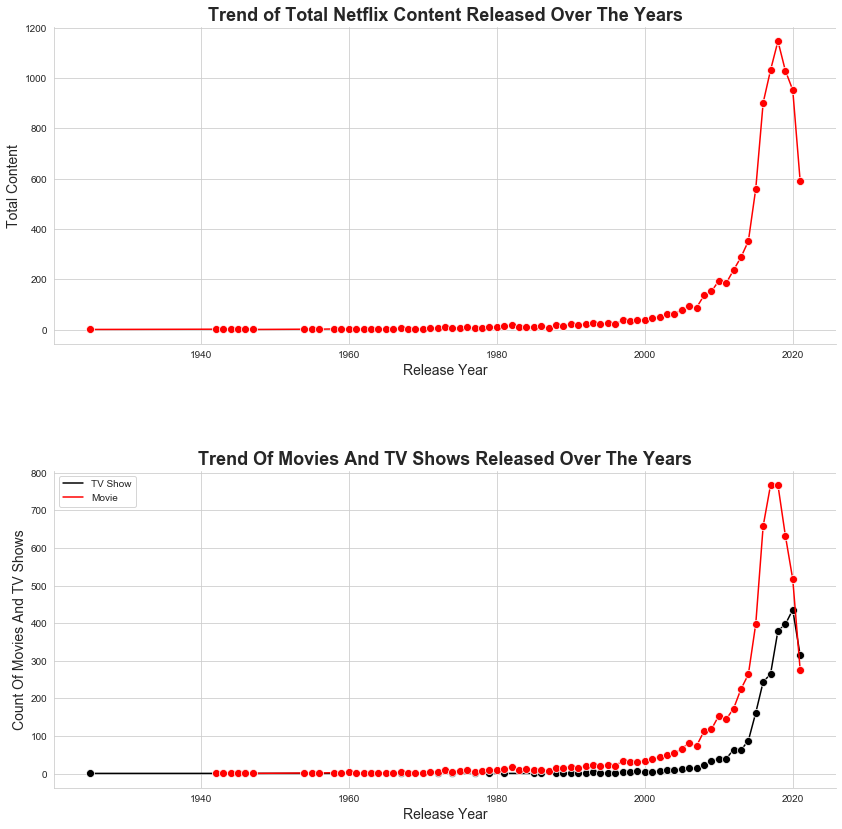

In [37]:
#second plot
grouped = data.groupby(["release_year","type"])["title"].count()
fig = plt.figure(figsize=(14,14))
sub = fig.add_subplot(212)
x = grouped.index.get_level_values("release_year").values
h = grouped.index.get_level_values("type").values
line = sn.lineplot(x,grouped.values, hue=h, marker='o',palette=['k','r'],markersize=8)
plt.title("Trend Of Movies And TV Shows Released Over The Years", fontsize=18,fontweight='bold')
plt.xlabel("Release Year",fontsize=14)
plt.ylabel("Count Of Movies And TV Shows",fontsize=14)
line.spines["top"].set_visible(False)
line.spines["right"].set_visible(False)
#first plot
grouped2 = data.groupby("release_year")["title"].count()
sub2 = fig.add_subplot(211)
line2 = sn.lineplot(grouped2.index,grouped2.values, marker='o',color='red',markersize=8)
plt.title("Trend of Total Netflix Content Released Over The Years", fontsize=18,fontweight='bold')
plt.xlabel("Release Year",fontsize=14)
plt.ylabel("Total Content",fontsize=14)
line2.spines["top"].set_visible(False)
line2.spines["right"].set_visible(False)
plt.subplots_adjust(hspace=0.4)
plt.show()


In [38]:
grouped.sort_values(ascending=False)

release_year  type   
2017          Movie      767
2018          Movie      767
2016          Movie      658
2019          Movie      633
2020          Movie      517
                        ... 
1972          TV Show      1
1963          Movie        1
              TV Show      1
1989          TV Show      1
1925          TV Show      1
Name: title, Length: 119, dtype: int64

#### The total content count increased over the years and then noticeably decreased from 2018-2021. This could be due to the advent of COVID-19 and the restrictions that were placed during these years.
#### The year with the highest number of content release (i.e. both Movie and TV Show release) was 2018. Most years had just one Movie/TV Shows released in them and theses were the older years (before 2000). From around year 2000 and above, the numbers increased gradually. Close to 600 movies and shows were released last year.
#### The count of movies released followed a similar trend as in the first plot. However, two years share the highest position in this graph- 2017 and 2018.
#### Both years had the same number of movies released- 767. However, from the first plot, we see that 2018 had the highest number of total content released. This shows that 2018 had a higher number of TV shows than 2017. 
#### Lastly, the count of TV shows released show a different trend. The numbers start to increase around year 2010 and peaks at year 2020. Generally, more movies were released compared to TV shows (there are more movies than TV shows in the dataset).

### WHICH DIRECTOR HAD THE HIGHEST COUNT OF MOVIES AND TV SHOWS?

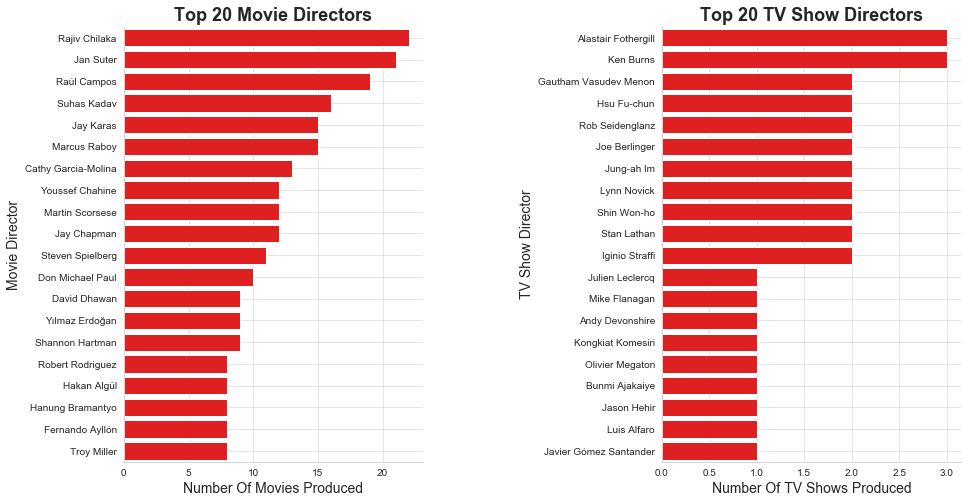

In [39]:
#separating the values in the movies director column.
m_dic = separate_values(movies["director"])
m_keys = sorted(m_dic,key=m_dic.get,reverse=True)[1:21]
m_val = [m_dic[i] for i in m_keys]
#plotting the first bar plot
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
bars = sn.barplot(m_val,m_keys, color='red')
plt.title("Top 20 Movie Directors", fontsize=18, fontweight='bold')
plt.xlabel("Number Of Movies Produced", fontsize=14)
plt.ylabel("Movie Director", fontsize=14)
bars.spines["top"].set_visible(False)
bars.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
#separating the values in the tvshow director column.
t_dic = separate_values(tvshow["director"])
t_keys = sorted(t_dic,key=t_dic.get, reverse=True)[1:21]
t_val = [t_dic[i] for i in t_keys]
#plotting the second bar plot
ax2 = fig.add_subplot(122)
bars2 = sn.barplot(t_val,t_keys,color='red')
plt.title("Top 20 TV Show Directors",fontsize=18,fontweight='bold')
plt.xlabel("Number Of TV Shows Produced",fontsize=14)
plt.ylabel("TV Show Director",fontsize=14)
bars2.spines["top"].set_visible(False)
bars2.spines["right"].set_visible(False)
plt.subplots_adjust(wspace=0.8)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### According to a Google search, the most popular netflix movie director is Martin Scorsese. While one may think he will also have the highest number of Netflix movies, we can see from the graph below that this is not the case. Rajiv Chilaka, an animator has the highest number of movies (more than 20 movies). Martin Scorsese has the nineth highest number on the list (less than 15 movies).
#### Alastair Fothergill and Ken Burns have the highest TV Show count (they have both directed 3 TV shows).

### WHICH DIRECTOR(S) MADE THE LONGEST MOVIES?

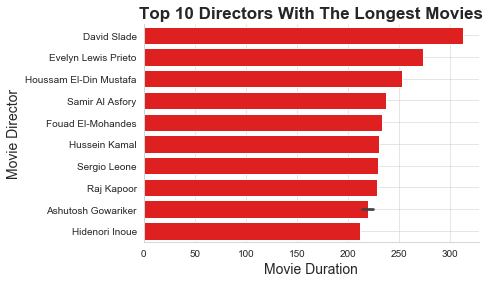

In [40]:
movies.at['s4254','director'] = 'David Slade'
movies.at['s718','director'] = 'Evelyn Lewis Prieto'
duration = movies.sort_values(by="duration",ascending=False)[:11]
bar = sn.barplot(duration["duration"],duration["director"],color='red')
plt.title("Top 10 Directors With The Longest Movies",fontsize=17,fontweight='bold')
plt.xlabel("Movie Duration",fontsize=14)
plt.ylabel("Movie Director",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

In [41]:
duration

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s4254,Movie,Black Mirror: Bandersnatch,David Slade,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."
s718,Movie,Headspace: Unwind Your Mind,Evelyn Lewis Prieto,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",Unknown,2021-06-15,2021,TV-G,273,Documentaries,"Do you want to relax, meditate or sleep deeply..."
s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...
s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,1979,TV-14,237,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...
s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",Unknown,2020-05-21,1982,TV-PG,233,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...
s2489,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",Unknown,2020-05-21,1984,TV-14,230,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...
s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...
s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,2019-12-31,1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...
s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",2021-04-17,2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ..."


#### David Slade directed the longest movie (Black Mirror: Bandersnatch). Houssam El-Din Mustafa (an Egyptian) is the first african director on the ranked list.

### MOST USED WORDS IN MOVIE/TV SHOW DESCRIPTION?

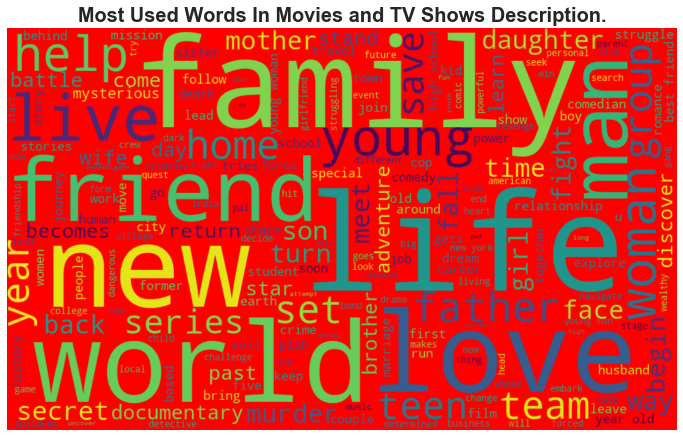

In [42]:
#setting the stopwords 
'''Stopwords are common words in a sentence that don't add meaning to the sentence (e.g. and, he, she etc). 
STOPWORDS is the default set of stopwords created by python.'''
stop_words = STOPWORDS.update(["take","find","one","two","three","four","takes","must","become","finds","S","make"]) 
#preparing the description column for visualization.
description_words = ''
values = data["description"].values #this is an array object of the entries in the description column.
for val in values:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    description_words += ' '.join(tokens)+' ' #putting every word in description column in a single string.
#plotting the wordcloud
plt.figure(figsize=(12,8))
wc = WordCloud(width=1000, height=600, background_color="red",min_font_size=10,stopwords=stop_words)
wc.generate(description_words)
plt.imshow(wc.recolor(random_state=17), interpolation='bilinear')
plt.axis("off")
plt.title("Most Used Words In Movies and TV Shows Description.",fontsize=20,fontweight='bold')
plt.show()

#### The most popular words are family, world, love, life, new, friend, secret, young, etc.

### WHICH RATING HAD THE HIGHEST COUNT OF MOVIES AND TV SHOWS?

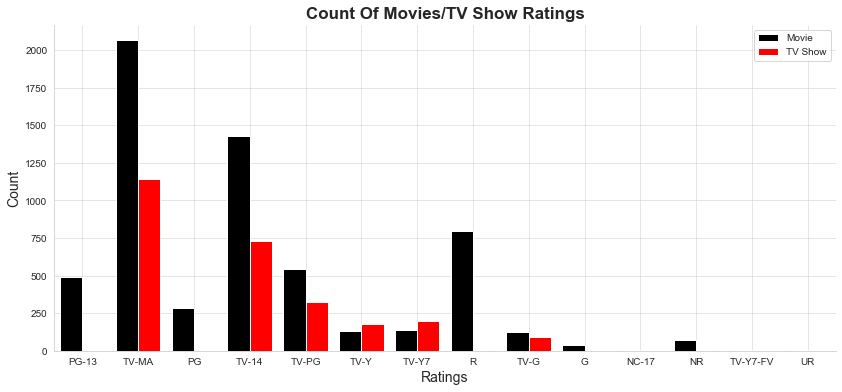

In [43]:
plt.figure(figsize=(14,6))
count = sn.countplot("rating",data=data,hue="type",palette=['k','r'],saturation=1)
plt.title("Count Of Movies/TV Show Ratings", fontsize=17,fontweight='bold')
plt.xlabel("Ratings",fontsize=14)
plt.ylabel("Count",fontsize=14)
count.spines["top"].set_visible(False)
count.spines["right"].set_visible(False)
plt.legend(loc='upper right')
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### TV-MA (Mature Adult) has the highest count for both movies and TV shows. This means most content on Netflix are rated for mature audiences. This agrees with the two scatterplot drawn above. In those scatterplots, it can be observed that TV-MA has a lot of data points.
#### Also, the second most common rating for movies is TV-14 (for 14 years old and above), followed by R. For TV shows, the second most common rating is also TV-14 but R -unlike for movies- has a very low count. We have more R-rated movies than R-rated TV shows on Netflix. The third most common rating for TV Shows is TV-PG (parental guidance is recommended).

### WHICH ACTOR/ACTRESS APPEARED IN THE HIGHEST NUMBER OF NETFLIX MOVIES?

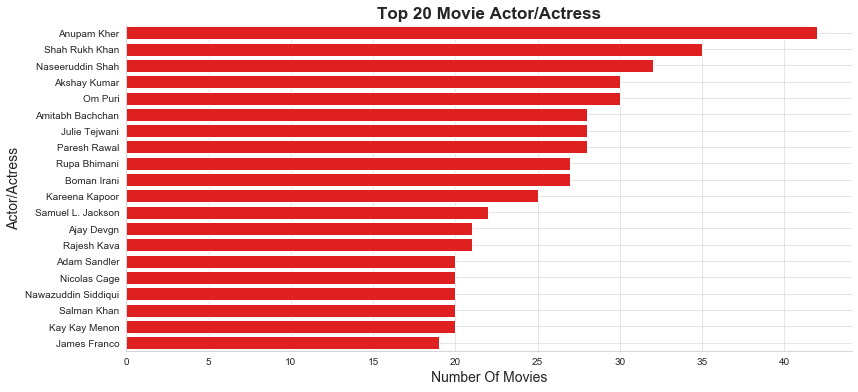

In [44]:
#separating the values in the movies cast column
m_act = separate_values(movies["cast"])
m_act_k = sorted(m_act,key=m_act.get, reverse=True)[1:21]
m_act_v = [m_act[i] for i in m_act_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_act_v,m_act_k,color='red')
plt.title("Top 20 Movie Actor/Actress", fontsize=17,fontweight='bold')
plt.xlabel("Number Of Movies",fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### Anupam Kher, an Indian actor, has appeared in the most Netflix movies. He has appeared in over 40 Netflix movies. Shah Rukh Khan comes second and is also an Indian actor.  Most people on this ranked list are Indians. The first eleven actor/actress on the list are Indians. The first non-Indian to appear on the list is Samuel L. Jackson, an American actor. He has appeared in about 20 Netflix movies. He, Adam Sandler, Nicolas Cage and James Franco appear to be the only americans on the list. The rest are Indians.
#### The first actress to appear on the list is Julie Tejwani, a voice actress (also from India). She comes seventh on the list. Julie Tejwani, Rupa Bhimani and Kareena Kapoor are the only actresses on the list, two of whom are voice actresses (Julie and Rupa).

### WHICH ACTOR/ACTRESS APPEARED IN THE HIGHEST NUMBER OF NETFLIX TV SHOWS?

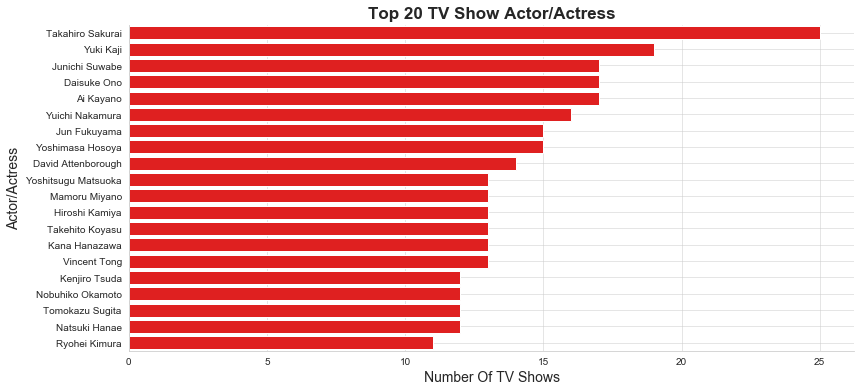

In [45]:
#separating the values in the tvshow cast column
t_act = separate_values(tvshow["cast"])
t_act_k = sorted(t_act,key=t_act.get, reverse=True)[1:21]
t_act_v = [t_act[i] for i in t_act_k]
#plotting the bar plot
plt.figure(figsize=(13,6))
bar = sn.barplot(t_act_v,t_act_k,color='red')
plt.title("Top 20 TV Show Actor/Actress",fontsize=17,fontweight='bold')
plt.xlabel("Number Of TV Shows", fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### Takahiro Sakurai, a Japanese voice actor, narrator and radio personality, has appeared in the most Netflix TV shows. Yuki Kaji, also a Japanese voice actor, has appeared in the second highest number of Netflix TV shows. The first eight people on the list are Japanese voice actor/actress, appearing mostly in cartoons and anime. The first non-Japanese to appear on the list is David Attenborough, an American broadcaster. He comes ninth on the list. Hiroshi Kamiya, a popular Japanese voice actor (appearing in a popular anime series: Attack On Titan) comes twelveth on the list. He appears in about 13 Netflix TV shows.
#### Vincent Tong is the first Canadian to appear on the list, coming fifteenth. He is also a voice actor. He and David Attenborough are the only non-Japanese to appear on the list. The rest are Japanese. Most of the people on this list are voice actor/actress.
#### The first actress to appear on the list is Ai Kayano, a Japanese voice actress. She and Kana Hanazawa are the only actresses on this list.

### WHICH ACTOR/ACTRESS APPEARED IN THE LEAST NUMBER OF MOVIES?

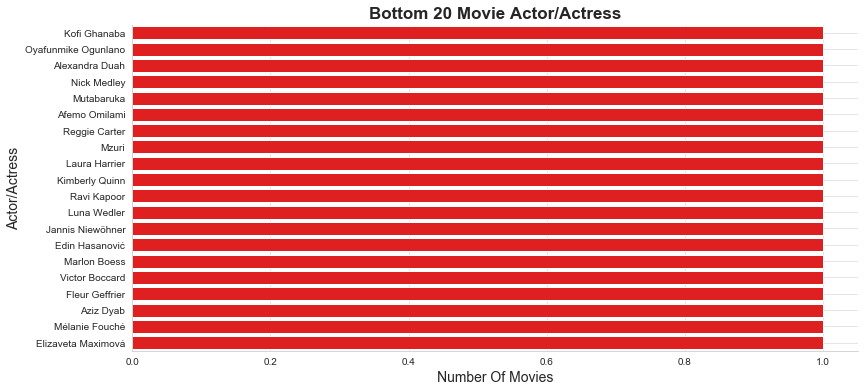

In [46]:
m_act_kl = sorted(m_act,key=m_act.get)[:20]
m_act_vl = [m_act[i] for i in m_act_kl]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_act_vl,m_act_kl,color='red')
plt.title("Bottom 20 Movie Actor/Actress", fontsize=17,fontweight='bold')
plt.xlabel("Number Of Movies",fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### All actors/actresses in this list appeared in just one Netflix movie. We have a mix of Nigerians, Ghanians, Jamacians, Americans, Swiss, French, British, Czech etc., actors/actresses on this list. There is no Indian except Ravi Kapoor, who is British but of Indian heritage.

### WHICH ACTOR/ACTRESS APPEARED IN THE LEAST NUMBER OF NETFLIX TV SHOWS?

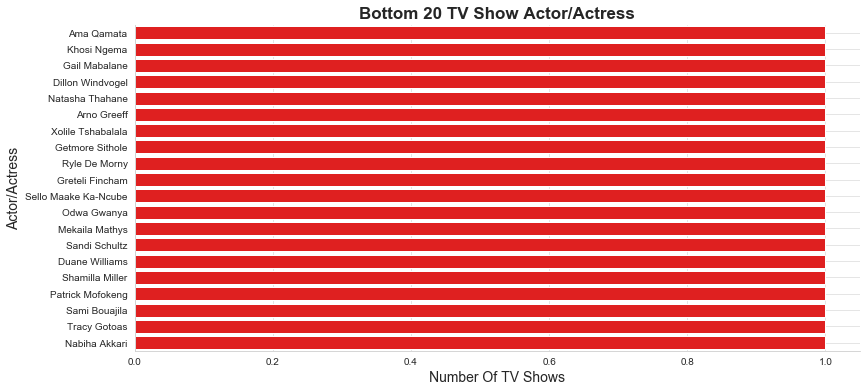

In [47]:
t_act_kl = sorted(t_act,key=t_act.get)[:20]
t_act_vl = [t_act[i] for i in t_act_kl]
#plotting the bar plot
plt.figure(figsize=(13,6))
bar = sn.barplot(t_act_vl,t_act_kl,color='red')
plt.title("Bottom 20 TV Show Actor/Actress",fontsize=17,fontweight='bold')
plt.xlabel("Number Of TV Shows", fontsize=14)
plt.ylabel("Actor/Actress",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### All actors and actresses in this list have only appeared in one Netflix TV Show. Most of the people on this list are South African actors/actresses. The first non-South African to pop up is Sami Bouajila, a French actor. He, Tracy Gotoas and Nabiha Akkari are the only three non-South African on this list and are all French.

### WHAT IS THE MOST POPULAR CATEGORY FOR MOVIES ON NETFLIX?

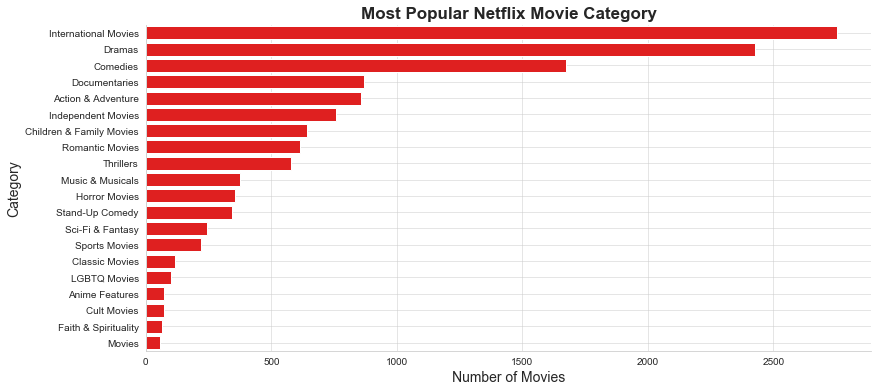

In [48]:
#separating and counting each category in the listed_in column
m_listed = separate_values(movies["listed_in"])
m_listed_k = sorted(m_listed,key=m_listed.get, reverse=True)
m_listed_v = [m_listed[i] for i in m_listed_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(m_listed_v,m_listed_k, color='red')
plt.title("Most Popular Netflix Movie Category",fontsize=17,fontweight='bold')
plt.xlabel("Number of Movies",fontsize=14)
plt.ylabel("Category",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### We have over 2500 movies listed in the International Movies category.

### WHAT IS THE MOST POPULAR CATEGORY FOR TV SHOWS ON NETFLIX?

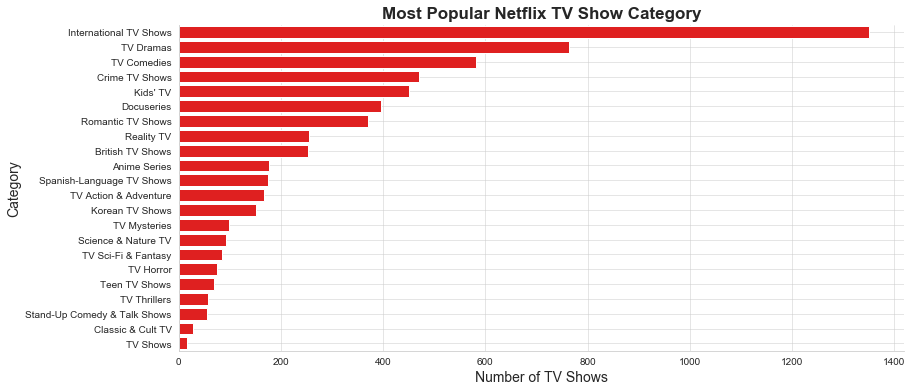

In [49]:
#separating and counting each category in the listed_in column
t_listed = separate_values(tvshow["listed_in"])
t_listed_k = sorted(t_listed,key=t_listed.get, reverse=True)
t_listed_v = [t_listed[i] for i in t_listed_k]
#plotting the graph
plt.figure(figsize=(13,6))
bar = sn.barplot(t_listed_v,t_listed_k, color='red')
plt.title("Most Popular Netflix TV Show Category",fontsize=17,fontweight='bold')
plt.xlabel("Number of TV Shows",fontsize=14)
plt.ylabel("Category",fontsize=14)
bar.spines["top"].set_visible(False)
bar.spines["right"].set_visible(False)
plt.grid(linewidth=0.5, in_layout=False)
plt.show()

#### There are more than 1200 TV Shows listed in the International TV Shows category.

### WHAT ARE THE CATEGORIES OF THE LONGEST MOVIES?

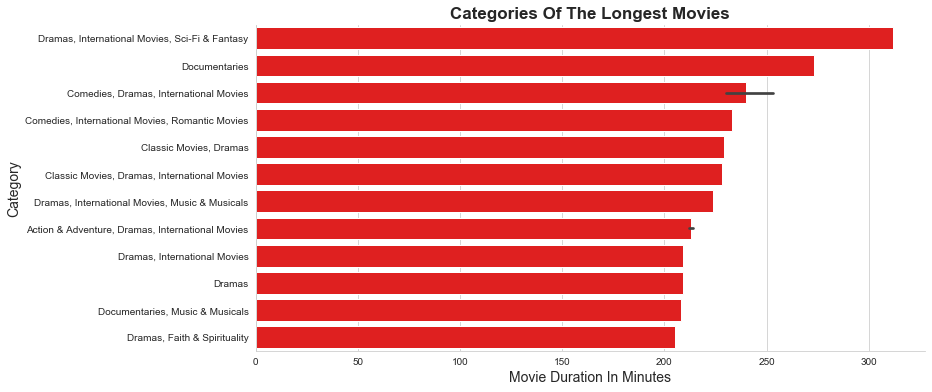

In [50]:
mini_df = movies[["duration","listed_in"]].sort_values(by="duration",ascending=False)[:15]
plt.figure(figsize=(12,6))
plot = sn.barplot(mini_df["duration"],mini_df["listed_in"],color='red')
plt.title("Categories Of The Longest Movies",fontsize=17,fontweight='bold')
plt.xlabel("Movie Duration In Minutes",fontsize=14)
plt.ylabel("Category",fontsize=14)
plot.spines["top"].set_visible(False)
plot.spines["right"].set_visible(False)
plt.show()

#### Most people would expect the longest movie to be a documentary, because documentaries are known to be very long. But, the longest movie is actually listed in the Dramas, International Movies, Sci-Fi and Fantasy categories. 
#### However, the second longest movie is listed in the Documentaries category. Most of the longest movies are listed in the Dramas category.

### WHAT ARE THE CATEGORIES FOR THE LONGEST TV SHOWS?

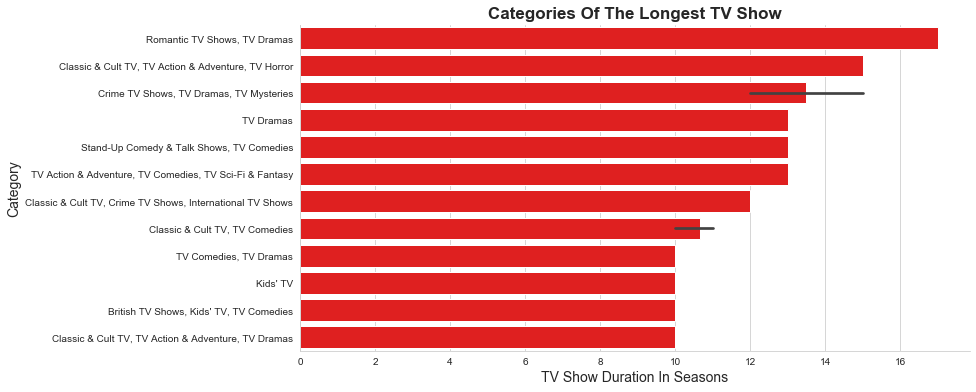

In [51]:
mini_df2 = tvshow[["duration","listed_in"]].sort_values("duration",ascending=False)[:15]
plt.figure(figsize=(12,6))
plot2 = sn.barplot(mini_df2["duration"],mini_df2["listed_in"],color='red')
plt.title("Categories Of The Longest TV Show",fontsize=17,fontweight='bold')
plt.xlabel("TV Show Duration In Seasons",fontsize=14)
plt.ylabel("Category",fontsize=14)
plot2.spines["top"].set_visible(False)
plot2.spines["right"].set_visible(False)
plt.show()

In [52]:
tvshow.sort_values(by="duration",ascending=False)[:15]


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
s4799,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
s1355,TV Show,Heartland,Unknown,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
s4221,TV Show,COMEDIANS of the world,Unknown,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
s7848,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2014-09-15,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
s4965,TV Show,Trailer Park Boys,Unknown,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-30,2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...
s5413,TV Show,Criminal Minds,Unknown,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017-06-30,2017,TV-14,12,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...
s6796,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2016-04-06,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...


#### The longest TV Show (Grey's Anatomy) is listed in the Romantic TV Shows and TV Dramas categories, having 17 seasons.